<a href="https://colab.research.google.com/github/b-fatma/S2I-DM/blob/master/src/5_supervised/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical, Real

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikit-optimize
!pip install imbalanced-learn

# Loading the data

In [ ]:
y_train = pd.read_csv('/content/drive/MyDrive/dm_fire_prediction/feature_engineering/v1/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/dm_fire_prediction/feature_engineering/v1/y_test.csv')

X_test = pd.read_csv('/content/drive/MyDrive/dm_fire_prediction/feature_engineering/v1/X_test.csv')
X_train = pd.read_csv('/content/drive/MyDrive/dm_fire_prediction/feature_engineering/v1/X_train.csv')

X_test_scaled = pd.read_csv('/content/drive/MyDrive/dm_fire_prediction/feature_engineering/v1/X_test_scaled.csv')
X_train_scaled = pd.read_csv('/content/drive/MyDrive/dm_fire_prediction/feature_engineering/v1/X_train_scaled.csv')

In [ ]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()

# Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=0)

search_space = {
    # Split quality
    'criterion': Categorical(['gini', 'entropy']),

    # Tree size / complexity
    'max_depth': Integer(2, 40),
    'min_samples_split': Integer(2, 30),
    'min_samples_leaf': Integer(1, 20),
    'max_leaf_nodes': Integer(10, 200),

    # Feature usage
    'max_features': Categorical([None, 'sqrt', 'log2']),

    # Regularization
    'ccp_alpha': Real(1e-6, 1e-1, prior='log-uniform'),
}

### Original

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical, Real
from sklearn.tree import DecisionTreeClassifier

bayes_search = BayesSearchCV(
    estimator=dt,
    search_spaces=search_space,
    n_iter=60,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=0,
    verbose=1
)

bayes_search.fit(X_train, y_train)

best_model = bayes_search.best_estimator_
bayes_search.best_params_


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

OrderedDict([('ccp_alpha', 5.418871003287554e-06),
             ('criterion', 'gini'),
             ('max_depth', 22),
             ('max_features', None),
             ('max_leaf_nodes', 200),
             ('min_samples_leaf', 3),
             ('min_samples_split', 8)])

In [ ]:
print(classification_report(y_train, best_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     38228
           1       0.90      0.84      0.87     11469

    accuracy                           0.94     49697
   macro avg       0.93      0.90      0.91     49697
weighted avg       0.94      0.94      0.94     49697



### Random Over Sampler

((76456, 26), (76456,), np.int64(38228))

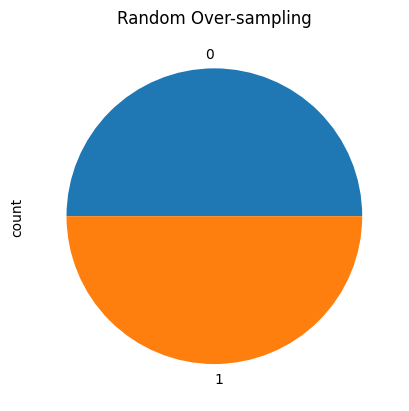

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_o_ros, y_o_ros = ros.fit_resample(X_train, y_train)
ax=y_o_ros.value_counts().plot.pie()
_ = ax.set_title("Random Over-sampling")
X_o_ros.shape, y_o_ros.shape, y_o_ros.sum()

In [ ]:
bayes_search.fit(X_o_ros, y_o_ros)

best_model_ros = bayes_search.best_estimator_
bayes_search.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

OrderedDict([('ccp_alpha', 1e-06),
             ('criterion', 'gini'),
             ('max_depth', 32),
             ('max_features', None),
             ('max_leaf_nodes', 200),
             ('min_samples_leaf', 1),
             ('min_samples_split', 21)])

In [ ]:
print(classification_report(y_train, best_model_ros.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     38228
           1       0.77      0.94      0.85     11469

    accuracy                           0.92     49697
   macro avg       0.88      0.93      0.90     49697
weighted avg       0.93      0.92      0.92     49697



### TOMEK

((48940, 26), (48940,), np.int64(11469))

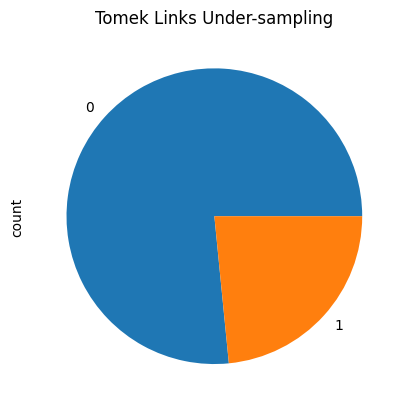

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_u_tl, y_u_tl = tl.fit_resample(X_train, y_train)

ax = y_u_tl.value_counts().plot.pie()
_ = ax.set_title("Tomek Links Under-sampling")

X_u_tl.shape, y_u_tl.shape, y_u_tl.sum()

In [ ]:
bayes_search.fit(X_u_tl, y_u_tl)

best_model_tl = bayes_search.best_estimator_
bayes_search.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

OrderedDict([('ccp_alpha', 8.152775231503043e-06),
             ('criterion', 'gini'),
             ('max_depth', 17),
             ('max_features', None),
             ('max_leaf_nodes', 200),
             ('min_samples_leaf', 9),
             ('min_samples_split', 14)])

In [ ]:
print(classification_report(y_train, best_model_tl.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     38228
           1       0.88      0.85      0.87     11469

    accuracy                           0.94     49697
   macro avg       0.92      0.91      0.91     49697
weighted avg       0.94      0.94      0.94     49697



### SMOTE Oversampling

((76456, 26), (76456,), np.int64(38228))

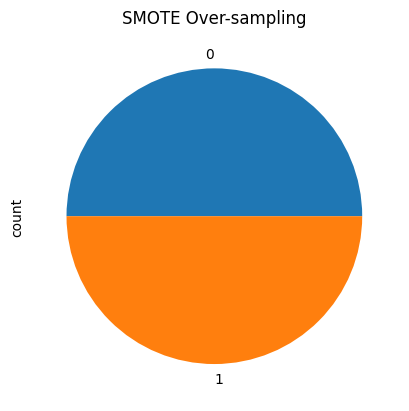

In [ ]:
from imblearn.over_sampling import SMOTE

smot = SMOTE(random_state=42)
X_o_smot, y_o_smot = smot.fit_resample(X_train, y_train)
ax=y_o_smot.value_counts().plot.pie()
_ = ax.set_title("SMOTE Over-sampling")
X_o_smot.shape, y_o_smot.shape, y_o_smot.sum()

In [ ]:
bayes_search.fit(X_o_smot, y_o_smot)

best_model_smot = bayes_search.best_estimator_
bayes_search.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

OrderedDict([('ccp_alpha', 0.00016823460800348208),
             ('criterion', 'gini'),
             ('max_depth', 34),
             ('max_features', None),
             ('max_leaf_nodes', 200),
             ('min_samples_leaf', 1),
             ('min_samples_split', 30)])

In [ ]:
print(classification_report(y_train, best_model_smot.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     38228
           1       0.79      0.92      0.85     11469

    accuracy                           0.92     49697
   macro avg       0.88      0.92      0.90     49697
weighted avg       0.93      0.92      0.93     49697



# Evaluation on the test set

In [ ]:
print(classification_report(y_test, best_model_smot.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      4248
           1       0.76      0.89      0.82      1274

    accuracy                           0.91      5522
   macro avg       0.86      0.90      0.88      5522
weighted avg       0.92      0.91      0.91      5522



In [ ]:
print(classification_report(y_test, best_model_ros.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      4248
           1       0.75      0.92      0.83      1274

    accuracy                           0.91      5522
   macro avg       0.86      0.91      0.88      5522
weighted avg       0.92      0.91      0.91      5522



In [ ]:
print(classification_report(y_test, best_model_tl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4248
           1       0.86      0.84      0.85      1274

    accuracy                           0.93      5522
   macro avg       0.91      0.90      0.90      5522
weighted avg       0.93      0.93      0.93      5522



In [ ]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4248
           1       0.88      0.82      0.85      1274

    accuracy                           0.93      5522
   macro avg       0.91      0.89      0.90      5522
weighted avg       0.93      0.93      0.93      5522



# From scratch

In [ ]:
import numpy as np
from collections import Counter

class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.root = self._build_tree(X, y, depth=0)
        return self

    def predict(self, X):
      X = np.array(X)
      return np.array([self._predict_single(row, self.root) for row in X])


    def _build_tree(self, X, y, depth):
        num_samples, num_features = X.shape

        # When to stop:
        if (
            depth >= self.max_depth
            or len(np.unique(y)) == 1
            or num_samples < self.min_samples_split
        ):
            return DecisionTreeNode(value=self._most_common_label(y))

        feature, threshold = self._best_split(X, y)

        # If no valid split found => make leaf
        if feature is None:
            return DecisionTreeNode(value=self._most_common_label(y))

        # Split dataset
        left_idx = X[:, feature] <= threshold
        right_idx = X[:, feature] > threshold

        # SAFETY: If either side is empty => leaf
        if np.sum(left_idx) == 0 or np.sum(right_idx) == 0:
            return DecisionTreeNode(value=self._most_common_label(y))

        left_child = self._build_tree(X[left_idx], y[left_idx], depth + 1)
        right_child = self._build_tree(X[right_idx], y[right_idx], depth + 1)

        return DecisionTreeNode(
            feature=feature,
            threshold=threshold,
            left=left_child,
            right=right_child,
        )

    def _best_split(self, X, y):
        best_gain = -1
        best_feature = None
        best_threshold = None

        n_samples, n_features = X.shape

        for feature in range(n_features):
            feature_values = X[:, feature]
            # thresholds = np.unique(feature_values)
            sorted_vals = np.unique(feature_values)
            thresholds = (sorted_vals[:-1] + sorted_vals[1:]) / 2


            for threshold in thresholds:
                left_idx = feature_values <= threshold
                right_idx = feature_values > threshold

                if np.sum(left_idx) == 0 or np.sum(right_idx) == 0:
                    continue

                gain = self._information_gain(y, feature_values, threshold)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _entropy(self, y):
        if len(y) == 0:
            return 0  # safety
        counts = Counter(y)
        probabilities = [count / len(y) for count in counts.values()]
        return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

    def _information_gain(self, y, feature_values, threshold):
        parent_entropy = self._entropy(y)

        left_idx = feature_values <= threshold
        right_idx = feature_values > threshold

        # If split invalid → no gain
        if np.sum(left_idx) == 0 or np.sum(right_idx) == 0:
            return 0

        n = len(y)
        n_left = np.sum(left_idx)
        n_right = np.sum(right_idx)

        child_entropy = (n_left / n) * self._entropy(y[left_idx]) + \
                        (n_right / n) * self._entropy(y[right_idx])

        return parent_entropy - child_entropy

    def _predict_single(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._predict_single(x, node.left)
        else:
            return self._predict_single(x, node.right)

    def _most_common_label(self, y):
        if len(y) == 0:
            return None  # safety: prevents IndexError
        return Counter(y).most_common(1)[0][0]


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import time

dt = DecisionTree()

s_time = time.time()
dt.fit(X_train, y_train)
print("Training time: ", time.time() - s_time)

s_time = time.time()
y_pred = dt.predict(X_test)
print("Prediction time: ", time.time() - s_time)


print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Training time:  1838.679093837738
Prediction time:  0.030705928802490234
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4248
           1       0.84      0.84      0.84      1274

    accuracy                           0.93      5522
   macro avg       0.90      0.90      0.90      5522
weighted avg       0.93      0.93      0.93      5522

Accuracy: 0.9272002897500905
